# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from mpl_toolkits import mplot3d

from scipy.signal import savgol_filter

from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results'

# Loading data

## UV/Vis spectra (scaled & smoothed)

In [4]:
path_to_uv_vis = './../data/preprocessed_data/uv_vis_scaled.csv'

In [5]:
data = pd.read_csv(path_to_uv_vis, sep=',', index_col=0)

print(data.shape)
data.head(3)

(26, 1421)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421
wavelength,900.000000,899.500000,899.000000,898.500000,8.980000e+02,897.500000,897.000000,896.500000,896.000000,895.500000,895.000000,894.500000,894.000000,893.500000,893.000000,892.500000,892.000000,891.500000,891.000000,890.500000,890.000000,889.500000,889.000000,888.500000,888.000000,...,202.000000,201.500000,201.000000,200.50000,200.000000,199.500000,199.000000,198.500000,198.000000,197.500000,197.000000,196.500000,196.000000,195.500000,195.000000,194.500000,194.000000,193.500000,193.000000,192.50000,192.000000,191.500000,191.000000,190.500000,190.000000
1,0.000028,0.000017,0.000009,0.000003,4.766199e-07,0.000000,0.000002,0.000006,0.000013,0.000021,0.000032,0.000044,0.000058,0.000074,0.000092,0.000111,0.000131,0.000153,0.000176,0.000200,0.000225,0.000251,0.000278,0.000306,0.000334,...,0.908611,0.906940,0.905411,0.90403,0.902806,0.901747,0.900858,0.900149,0.899625,0.899296,0.899168,0.899248,0.899545,0.900065,0.900816,0.901806,0.903042,0.904531,0.906281,0.90830,0.910594,0.913171,0.916039,0.919206,0.922678
2,0.000000,0.000337,0.000658,0.000963,1.252841e-03,0.001527,0.001787,0.002034,0.002266,0.002486,0.002694,0.002889,0.003073,0.003247,0.003410,0.003563,0.003707,0.003842,0.003969,0.004088,0.004200,0.004306,0.004405,0.004498,0.004586,...,0.977502,0.978137,0.978782,0.97944,0.980112,0.980801,0.981509,0.982239,0.982991,0.983769,0.984575,0.985411,0.986280,0.987182,0.988121,0.989099,0.990117,0.991179,0.992286,0.99344,0.994644,0.995900,0.997210,0.998576,1.000000


## Samples description

In [6]:
path_to_samples_description = './../../ftir/qualitative_analysis/data/preprocessed_data/ftir_description.csv'

In [7]:
samples_description = pd.read_csv(path_to_samples_description, sep=',', index_col=0)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


*Selecting only `Train` part of samples description*

In [8]:
samples_description = (
    samples_description
    .loc[samples_description['Label'] == 'Train']
    .drop(columns=['Label'])
)

print(samples_description.shape)
samples_description.head(3)

(25, 3)


,Description,Type,Class
1,"MFGO, разб. 1:20",$GO$,1
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1


# Data visualization & analysis

## 3D-visualization of all spectra

In [9]:
wavelength = data.loc['wavelength']

indexes = samples_description.index
types = samples_description['Type']

sample_id_type_dict = {f'{index}': type for index, type in zip(indexes, types)}

In [10]:
type_color_dict = {
    '$GO$': 'RoyalBlue',
    '$rGO$': 'Goldenrod',
    '$GO_{d}$': 'SeaGreen'
}

fontsize = 18

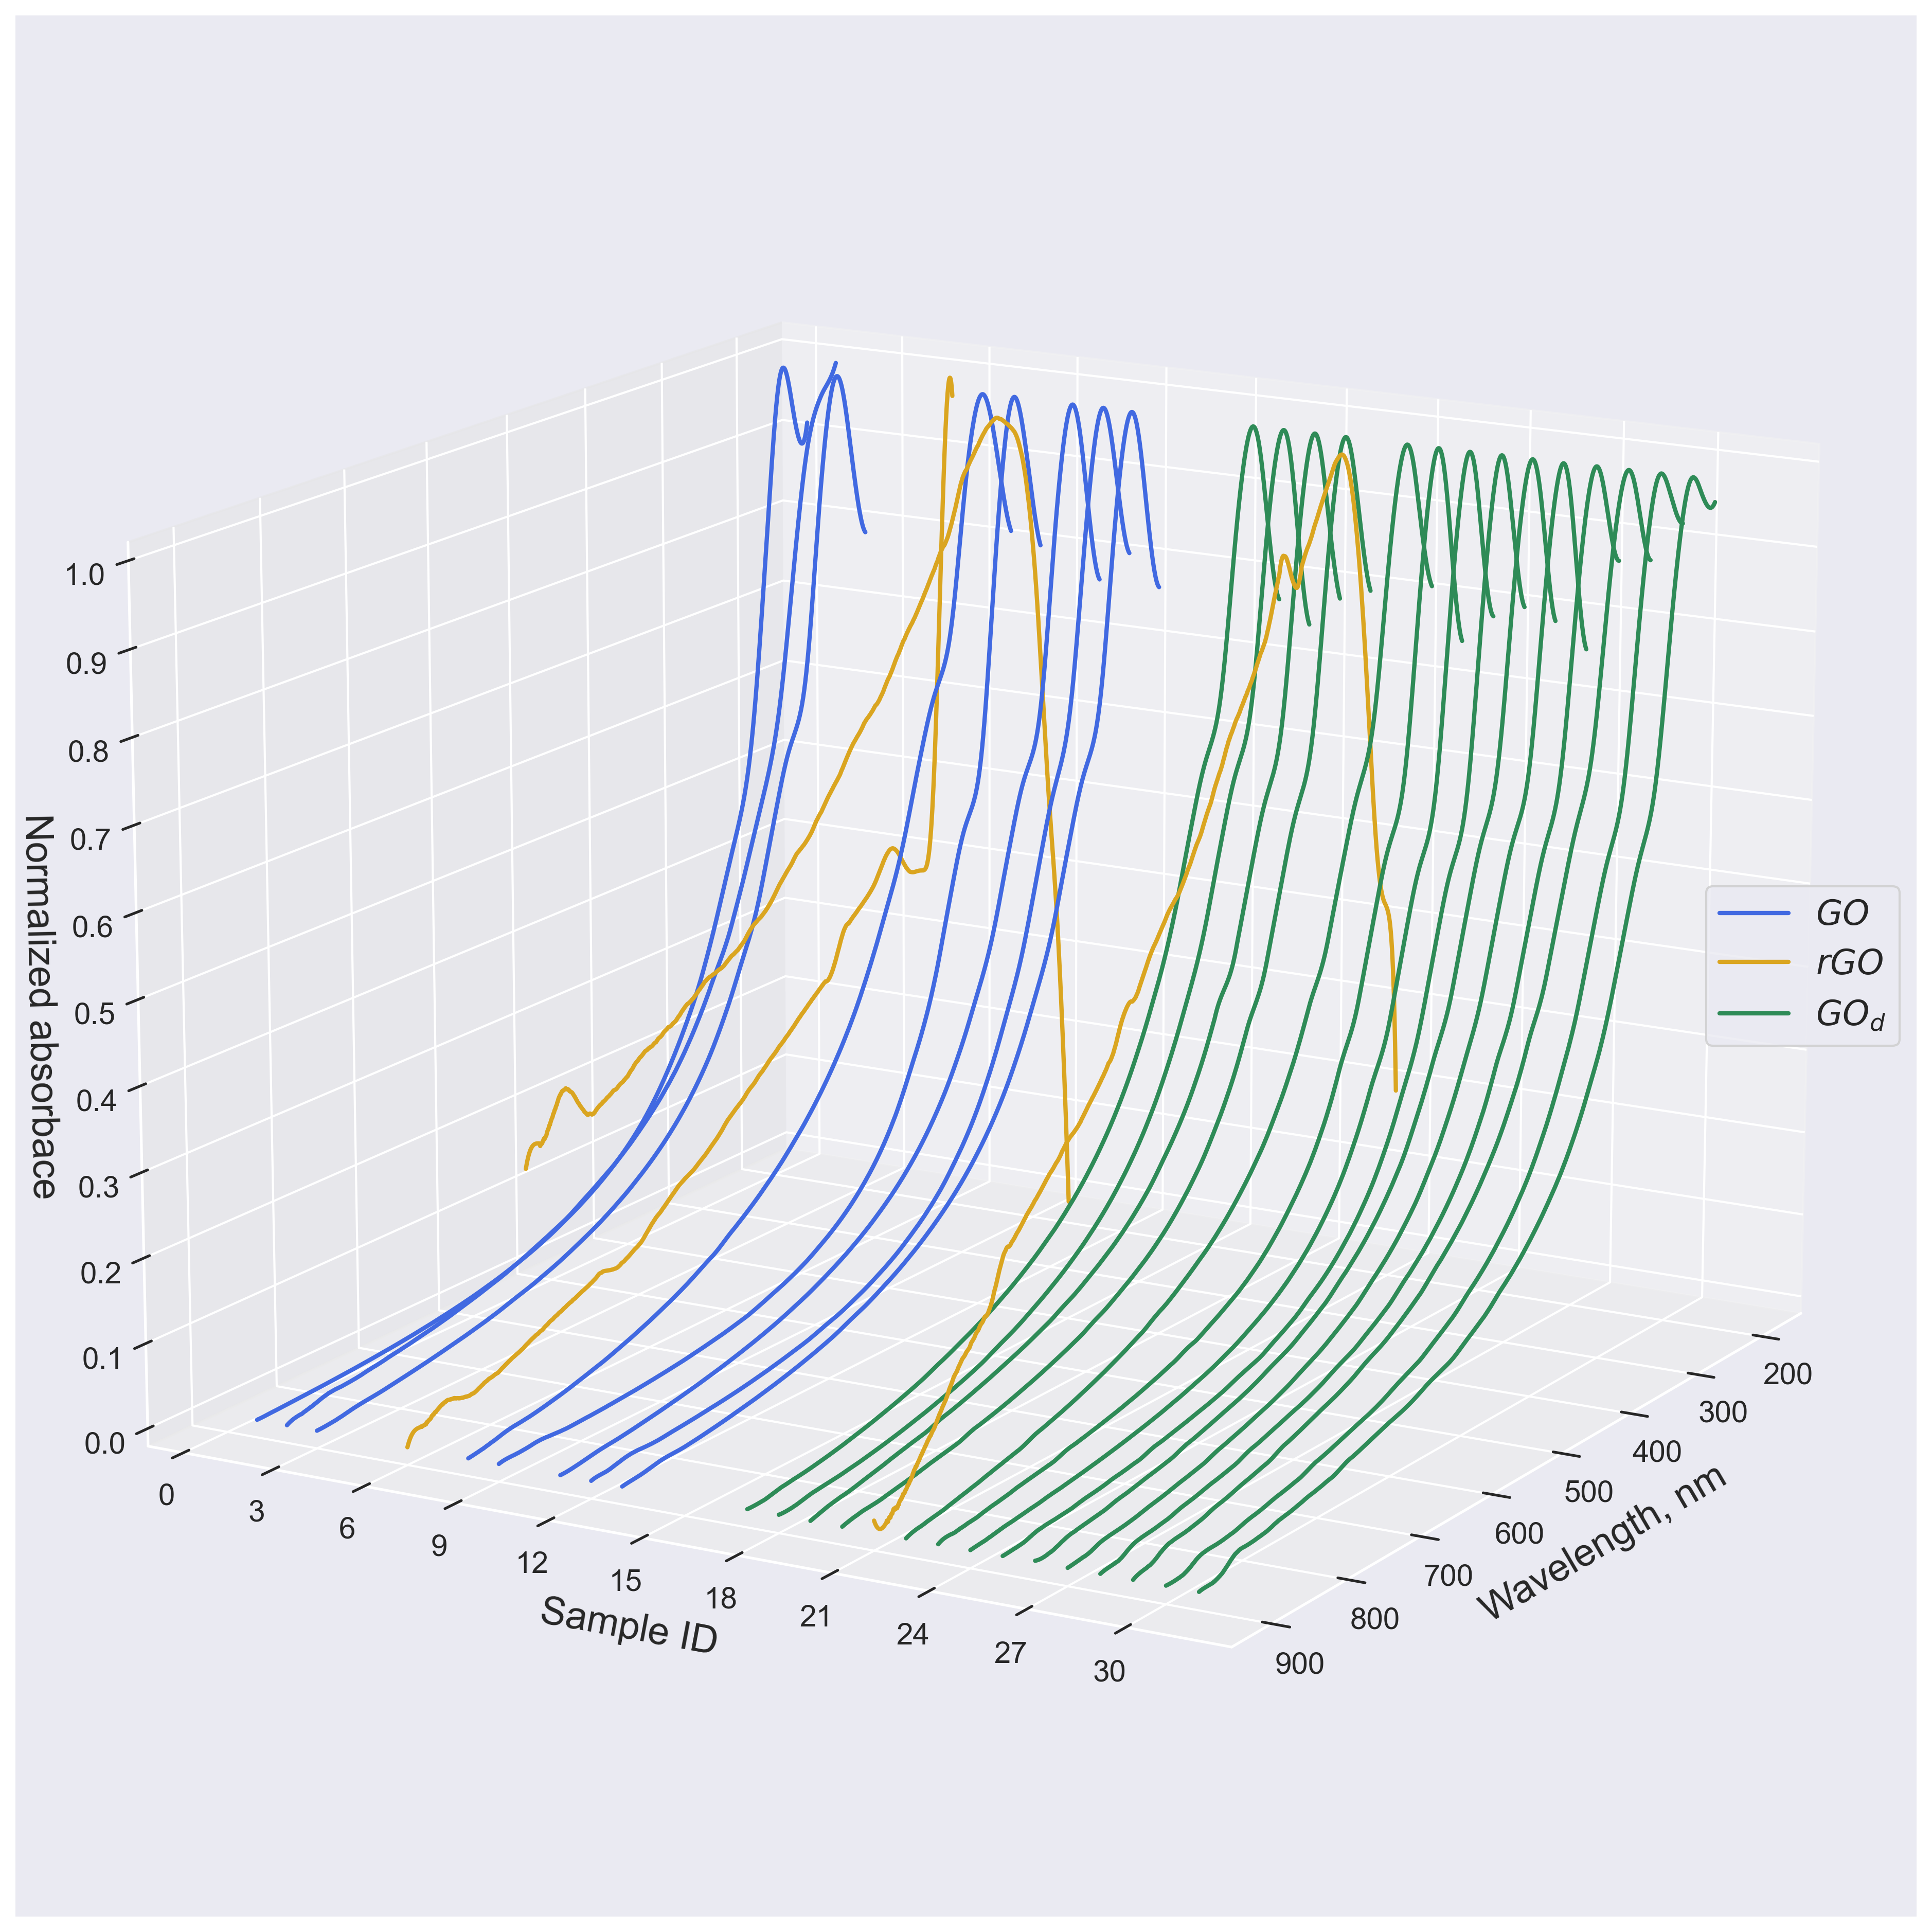

In [11]:
sns.set_theme()

fig = plt.figure(figsize=(16, 16), dpi=300)
ax = fig.add_subplot(projection='3d')

wavelength = pd.to_numeric(data.loc['wavelength'], errors='coerce')

legend_labels = {}

for index in data.index[1:]:
    sample_type = sample_id_type_dict[index]
    color = type_color_dict[sample_type]

    z = pd.to_numeric(data.loc[index], errors='coerce')
    x = wavelength
    y = np.full_like(wavelength, index, dtype=float)
    
    ax.plot(x, y, z, color=color, label=sample_type, linewidth=2.0)
    
    if sample_type not in legend_labels:
        legend_labels[sample_type] = plt.Line2D([0], [0], color=color, lw=2)

ax.set_xlabel('Wavelength, nm', fontstyle='normal', fontsize=fontsize, labelpad=10)
ax.set_ylabel('Sample ID', fontstyle='normal', fontsize=fontsize, labelpad=10)
ax.set_zlabel('Normalized absorbace', fontstyle='normal', rotation=90, fontsize=fontsize, labelpad=5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.zaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-4)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize-4)
ax.set_zticklabels(ax.get_zticklabels(), fontsize=fontsize-4)

ax.legend(legend_labels.values(), legend_labels.keys(), loc='center right', fontsize=fontsize-2)

ax.view_init(elev=15, azim=30)
ax.dist = 0
ax.grid(True)

plt.tight_layout()

plt.savefig(f'{path_to_save}/3d_visualization_spectra.png', dpi=600)

plt.show()

## Visualization of UV/Vis spectra derivatives & PCA results

In [12]:
fontsize = 16
fontstyle = 'normal'
linewidth = 3.0

markersize = 400
random_state = 42

n_components = 2

type_color_dict = {
    '$GO$': 'RoyalBlue',
    '$rGO$': 'Goldenrod',
    '$GO_{d}$': 'SeaGreen'
}

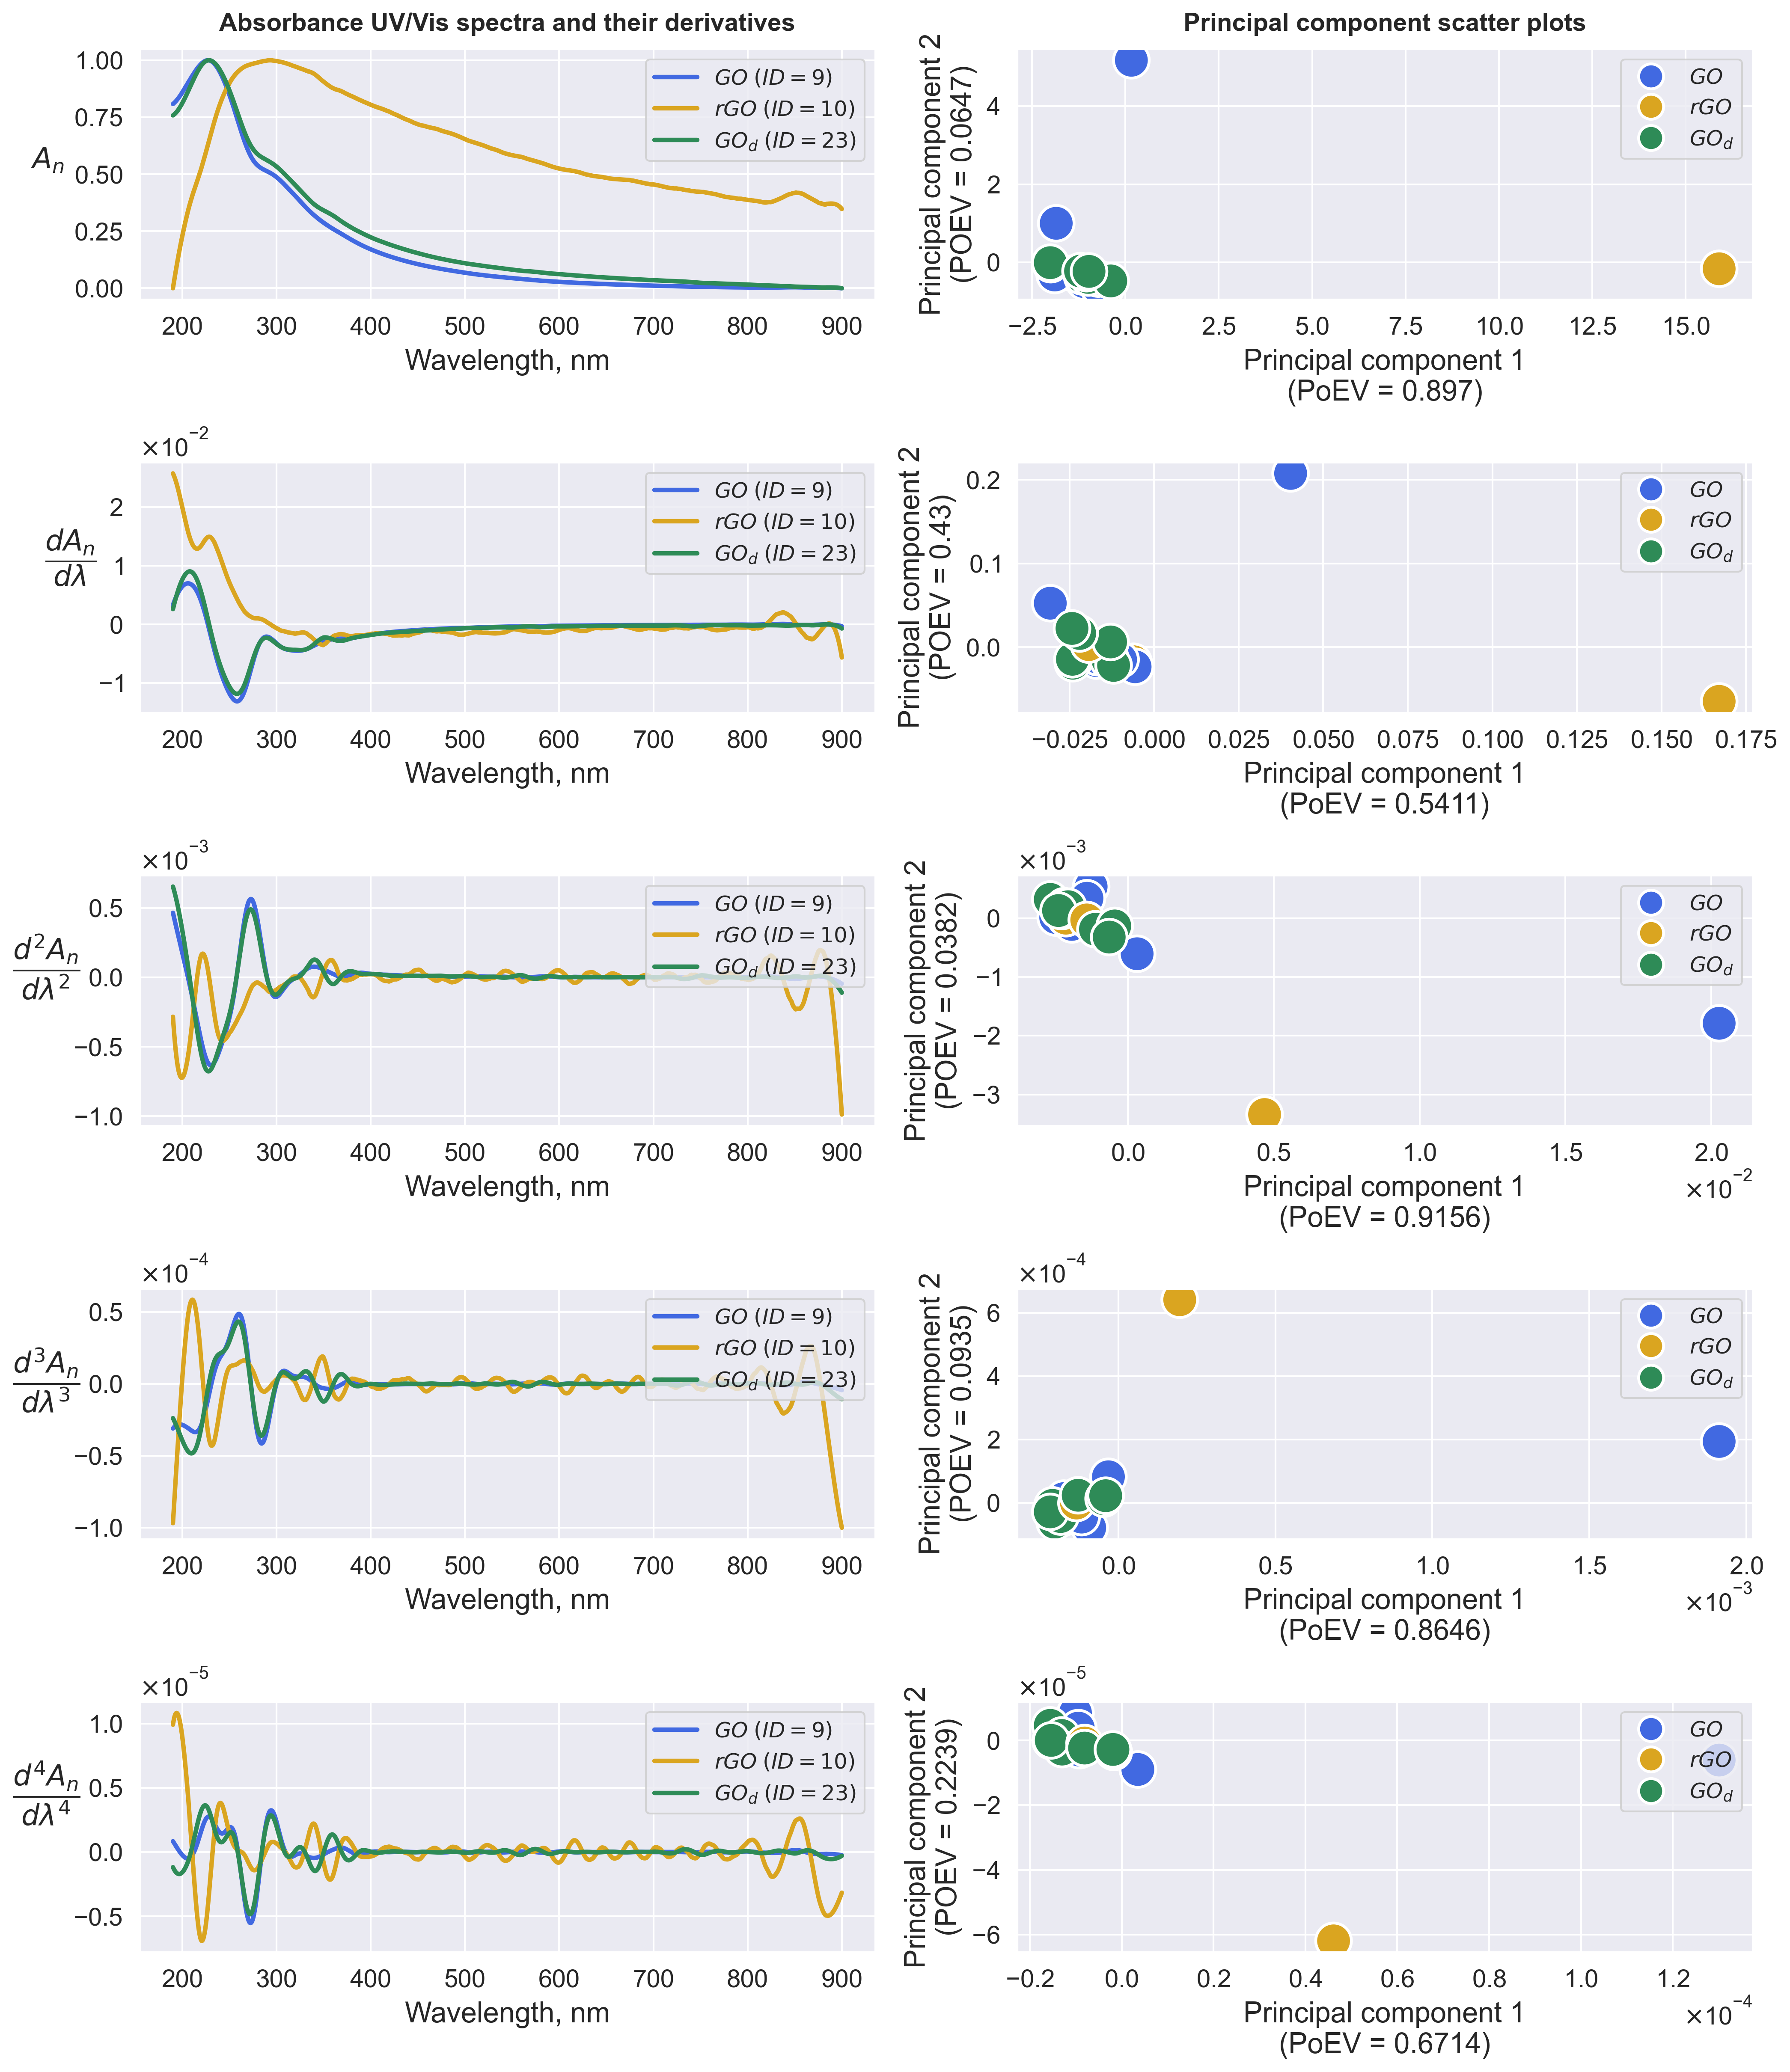

In [41]:
sns.set_theme()

fig, axes = plt.subplots(5, 2, figsize=(14, 16.3), dpi=300)
axes = axes.flatten()

axes[0].set_title("Absorbance UV/Vis spectra and their derivatives", fontsize=14, fontweight='bold', pad=10)
axes[1].set_title("Principal component scatter plots", fontsize=14, fontweight='bold', pad=10)

data_der = data.copy()

for i in range(5):
    wavelength = data_der.loc['wavelength']

    if i > 0:
        for idx in data_der.index[1:]:
            data_der.loc[idx] = savgol_filter(np.gradient(data_der.loc[idx], wavelength), window_length=63, polyorder=3)

    ax1 = axes[i * 2]
    ax2 = axes[i * 2 + 1]

    ax1.plot(wavelength, data_der.loc['9'], linewidth=2.5, color='RoyalBlue', label='$GO$ $(ID = 9)$')
    ax1.plot(wavelength, data_der.loc['10'], linewidth=2.5, color='Goldenrod', label='$rGO$ $(ID = 10)$')
    ax1.plot(wavelength, data_der.loc['23'], linewidth=2.5, color='SeaGreen', label='$GO_{d}$ $(ID = 23)$')

    ylabel_map = {
        0: "$A_{n}$",
        1: r"$\dfrac{dA_n}{d\lambda}$"
    }
    ylabel = ylabel_map.get(i, rf"$\dfrac{{d^{i}A_n}}{{d\lambda^{i}}}$")

    ax1.set_ylabel(ylabel, fontstyle='italic', fontsize=fontsize, labelpad=15, rotation=0)
    ax1.set_xlabel('Wavelength, nm', fontstyle='normal', fontsize=fontsize, labelpad=5)
    
    ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax1.yaxis.get_major_formatter().set_powerlimits((-2, 2))
    ax1.yaxis.get_offset_text().set_fontsize(fontsize-2)

    ax1.tick_params(axis='both', labelsize=fontsize-2)

    ax1.legend(loc='upper right', fontsize=fontsize-4)

    spectral_data = data_der.iloc[1:, :]
    pca = PCA(n_components=2, random_state=42)
    spectral_data_pca = pd.DataFrame(pca.fit_transform(spectral_data), columns=['PC_1', 'PC_2'])
    explained_variance = [round(k, 4) for k in pca.explained_variance_ratio_]

    spectral_data_pca = pd.concat([spectral_data_pca, samples_description['Type']], axis=1)

    sns.scatterplot(data=spectral_data_pca, x='PC_1', y='PC_2', hue='Type', palette=type_color_dict, s=400, ax=ax2)

    ax2.set_xlabel(f'Principal component 1\n(PoEV = {explained_variance[0]})', fontstyle='normal', fontsize=fontsize, labelpad=5)
    ax2.set_ylabel(f'Principal component 2\n(POEV = {explained_variance[1]})', fontstyle='normal', fontsize=fontsize, labelpad=5)

    for axis in [ax2.xaxis, ax2.yaxis]:
        axis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axis.get_major_formatter().set_powerlimits((-2, 2))  
        axis.offsetText.set_fontsize(fontsize-2)

    ax2.tick_params(axis='both', labelsize=fontsize-2)

    ax2.legend(loc='upper right', markerscale=0.7, fontsize=fontsize-4)

# plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.tight_layout()

plt.savefig(f'{path_to_save}/combined_spectra_pca.png', dpi=600)

plt.show()

## Long-wavelength scattering

In [14]:
# temp_df = derivative_df_dict[0]
# wavelength = temp_df.loc['wavelength']

# x = temp_df.loc['wavelength']
# rgo_spectrum = temp_df.loc[10]
# go_spectrum = temp_df.loc[9]
# god_spectrum = temp_df.loc[23]

In [15]:
# tmp = pd.concat([x, go_spectrum, god_spectrum, rgo_spectrum], axis=1)
# tmp.columns = ['Длина волны, нм', 'вОГ', 'ОГ', 'ОГ_{диализ}']
# # tmp.to_csv('tmp_df.csv')

In [16]:
# data = tmp.copy()

In [17]:
# data["вОГ"] = data["вОГ"].replace(0, 1e-6)
# data["ОГ"] = data["ОГ"].replace(0, 1e-6)
# data["ОГ_{диализ}"] = data["ОГ_{диализ}"].replace(0, 1e-6)

# # Calculate log-log values
# data["log(λ)"] = np.log(data["Длина волны, нм"])
# data["log(вОГ)"] = np.log(data["вОГ"])
# data["log(ОГ)"] = np.log(data["ОГ"])
# data["log(ОГ_{диализ})"] = np.log(data["ОГ_{диализ}"])

# # Plot log-log graphs for each sample
# plt.figure(figsize=(10, 6))
# for sample in ["вОГ", "ОГ", "ОГ_{диализ}"]:
#     plt.plot(data["log(λ)"], data[f"log({sample})"], label=sample)

# # Graph settings
# plt.xlabel("log(λ)")
# plt.ylabel("log(Intensity)")
# plt.title("Log-Log Plot of Intensity vs. Wavelength")
# plt.legend()
# plt.grid()
# plt.show()

# # Calculate slopes to verify Rayleigh scattering (-4)
# slopes = {}
# for sample in ["вОГ", "ОГ", "ОГ_{диализ}"]:
#     clean_data = data.dropna(subset=[f"log({sample})"])
#     slope = np.polyfit(clean_data["log(λ)"], clean_data[f"log({sample})"], 1)[0]
#     slopes[sample] = slope

# slopes

In [18]:
# filtered_data = data[(data["log(λ)"] >= 5.6) & (data["log(λ)"] <= 6.4)]

# # Calculate slopes (tangents of the angle) for the specified range
# tangents = {}
# for sample in ["вОГ", "ОГ", "ОГ_{диализ}"]:
#     # Ensure there are no NaN values
#     clean_data = filtered_data.dropna(subset=[f"log({sample})"])
#     if len(clean_data) > 1:  # Ensure there are enough points for a fit
#         tangent = np.polyfit(clean_data["log(λ)"], clean_data[f"log({sample})"], 1)[0]
#         tangents[sample] = tangent

# tangents